<hr style='border-top:4px solid #1F77B4;'>

<h2><span style="color: #1F77B4; font-size: 40px">Chapitre 1</span></h2>

<h1><span style="color: #1F77B4; font-size: 60px">Les fondamentaux de l'apprentissage machine</span></h1>

<hr style='border-top:4px solid #1F77B4;'>

### Importation des bibliothèques

In [1]:
from IPython.display           import display, HTML, Math
import os

<hr style='border-top:4px solid #1F77B4;'>

In [2]:
def save_figure(fig, path):
    # Extraire le répertoire du chemin donné
    directory = os.path.dirname(path)
    
    # Créer le répertoire s'il n'existe pas
    if not os.path.exists(directory):
        os.makedirs(directory)
    
    # Sauvegarder dans plusieurs formats
    fig.savefig(f"{path}.pdf", format="pdf", bbox_inches='tight')
    fig.savefig(f"{path}.png", format="png", bbox_inches='tight')
    fig.savefig(f"{path}.jpg", format="jpg", bbox_inches='tight')

<hr style='border-top:4px solid #1F77B4;'>

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.1 : Importation des bibliothèque et lecture des données Titanic</h3>

In [3]:
import seaborn as sns

# Charger le dataset Titanic
df = sns.load_dataset("titanic")

# Garder seulement les colonnes d'intérêt
df = df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

# Afficher un aperçu
display(df)

,survived,pclass,age,sibsp,parch,fare,embarked
0,0,3,22.0,1,0,7.2500,S
1,1,1,38.0,1,0,71.2833,C
2,1,3,26.0,0,0,7.9250,S
3,1,1,35.0,1,0,53.1000,S
4,0,3,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S
887,1,1,19.0,0,0,30.0000,S
888,0,3,NaN,1,2,23.4500,S
889,1,1,26.0,0,0,30.0000,C


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.2 : Suppression des données manquantes</h3>

In [4]:
# Vérification des colonnes avec des valeurs manquantes
missing_values = df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("Colonnes avec valeurs manquantes :")
print(columns_with_missing_values)

# Taille avant suppression
print(f"\nTaille avant suppression : {df.shape}")

# Suppression des lignes avec valeurs manquantes
df_dropped = df.dropna()

# Taille après suppression
print(f"Taille après suppression : {df_dropped.shape}")

Colonnes avec valeurs manquantes :
age         177
embarked      2
dtype: int64

Taille avant suppression : (891, 7)
Taille après suppression : (712, 7)


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.3 : Imputation des données manquantes par statistique (moyenne et mode)</h3>

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Données originales (avec valeurs manquantes)
age_original = df['age']
embarked_original = df['embarked']

# Copie du DataFrame pour imputation statistique
df_stat = df.copy()

# 1. Imputation de 'age' par la moyenne
mean_imputer = SimpleImputer(strategy='mean')
df_stat['age'] = mean_imputer.fit_transform(df_stat[['age']]).ravel()
age_stat = df_stat['age']

# 2. Imputation de 'embarked' par la valeur la plus fréquente (mode)
mode_imputer = SimpleImputer(strategy='most_frequent')
df_stat['embarked'] = mode_imputer.fit_transform(df_stat[['embarked']]).ravel()
embarked_stat = df_stat['embarked']

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.4 : Imputation des données manquantes par l'imputation par les k plus proches voisins</h3>

In [6]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder

# Définir un seul KNN imputer réutilisable avec 5 voisins
knn_imputer = KNNImputer(n_neighbors=5)

# 1. Imputation KNN pour 'age' (variable numérique)
features_num = ['age', 'fare', 'pclass', 'sibsp', 'parch']
df_knn_num = df[features_num].copy()
df_knn_imputed_num = pd.DataFrame(knn_imputer.fit_transform(df_knn_num),
                                  columns=features_num,
                                  index=df.index)

age_knn = df_knn_imputed_num['age']

# 2. Imputation KNN pour 'embarked' (variable catégorielle)
features_cat = ['embarked', 'fare', 'pclass', 'sibsp', 'parch']
df_knn_cat = df[features_cat].copy()

# Encodage → imputation → décodage
encoder = OrdinalEncoder()
df_knn_cat['embarked'] = encoder.fit_transform(df_knn_cat[['embarked']]).ravel()
df_knn_imputed_cat = pd.DataFrame(knn_imputer.fit_transform(df_knn_cat),
                                  columns=features_cat,
                                  index=df.index)

df_knn_imputed_cat['embarked'] = encoder.inverse_transform(
    df_knn_imputed_cat[['embarked']].values.reshape(-1, 1)).ravel()

embarked_knn = df_knn_imputed_cat['embarked']

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.5 : Imputation par régression</h3>

In [7]:
from sklearn.linear_model import LinearRegression

# Sélection des variables pertinentes pour prédire l'âge
df_reg = df[['age', 'fare', 'pclass', 'sibsp', 'parch']].copy()

# Création du jeu d'entraînement : lignes avec un âge connu
df_train = df_reg.dropna(subset=['age'])

# Création du jeu de prédiction : lignes avec un âge manquant
df_pred = df_reg[df_reg['age'].isnull()]

# Séparation des variables explicatives et de la variable cible (âge)
X_train = df_train.drop('age', axis=1)
y_train = df_train['age']
X_pred = df_pred.drop('age', axis=1)

# Entraînement du modèle de régression linéaire sur les données complètes
model = LinearRegression()
model.fit(X_train, y_train)
predicted_ages = model.predict(X_pred)

# Imputation des valeurs manquantes par les âges prédits
df_reg.loc[df_reg['age'].isnull(), 'age'] = predicted_ages
age_reg = df_reg['age']

<h3><span style="font-size: 30px">🎴</span> Figure 1.11 : Comparaison des distributions de l'âge après différentes imputations </h3>

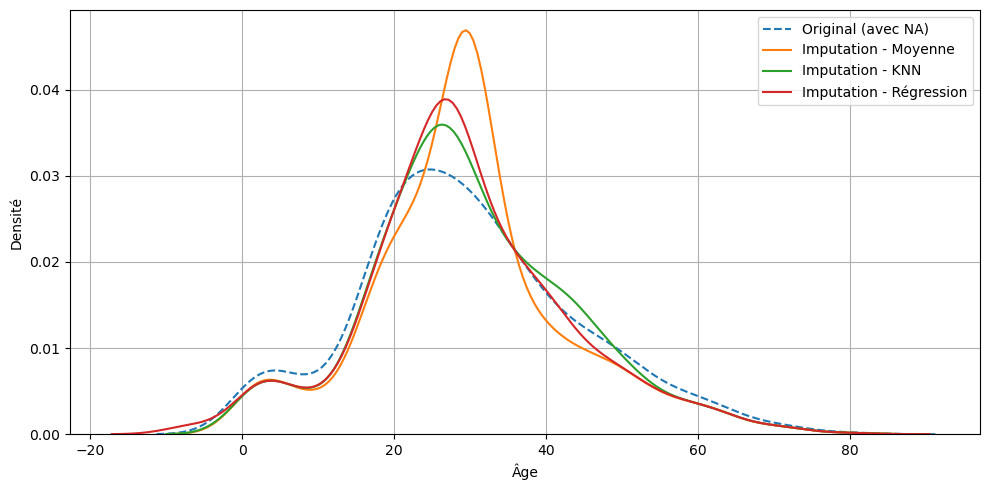

In [8]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(10, 5))
sns.kdeplot(age_original, label="Original (avec NA)", linestyle="--")
#sns.kdeplot(age_dropped, label="Suppression des NA")
sns.kdeplot(age_stat, label="Imputation - Moyenne")
sns.kdeplot(age_knn, label="Imputation - KNN")
sns.kdeplot(age_reg, label="Imputation - Régression")

plt.xlabel("Âge")
plt.ylabel("Densité")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_1.11/Chap1_Figure_1.11")

<h3><span style="font-size: 30px">🎴</span> Figure 1.12 : Visualisation des intervalles d'une distribution normale centrée réduite </h3>

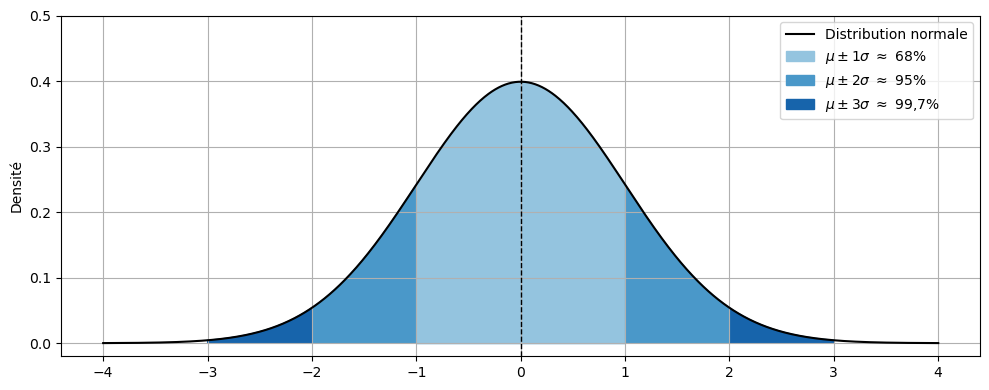

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Paramètres de la distribution
mu = 0
sigma = 1

# Générer les données
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, mu, sigma)

# Obtenir des couleurs depuis la colormap "Blues"
blues = plt.get_cmap("Blues")
color_1 = blues(0.4)  # clair
color_2 = blues(0.6)  # moyen
color_3 = blues(0.8)  # foncé

# Tracer la courbe
fig = plt.figure(figsize=(10, 4))
plt.plot(x, y, color='black', label='Distribution normale')

# Zone μ ± 1σ
plt.fill_between(x, y, where=(x > mu - sigma) & (x < mu + sigma),
                 color=color_1, label=r'$\mu \pm 1\sigma~\approx$ 68%')

# Zone μ ± 2σ (hors 1σ)
plt.fill_between(x, y, where=(x > mu - 2*sigma) & (x < mu + 2*sigma) & ~((x > mu - sigma) & (x < mu + sigma)),
                 color=color_2, label=r'$\mu \pm 2\sigma~\approx$ 95%')

# Zone μ ± 3σ (hors 2σ)
plt.fill_between(x, y, where=(x > mu - 3*sigma) & (x < mu + 3*sigma) & ~((x > mu - 2*sigma) & (x < mu + 2*sigma)),
                 color=color_3, label=r'$\mu \pm 3\sigma~\approx$ 99,7%')

# Ligne verticale sur la moyenne
plt.axvline(mu, color='black', linestyle='--', linewidth=1)

# Finitions du graphe
# plt.title("Distribution normale centrée réduite avec zones ±σ", fontsize=14)
#plt.xlabel("Valeurs")
plt.ylim(-0.02, 0.5)
plt.ylabel("Densité")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Affichage du graphique
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_1.12/Chap1_Figure_1.12")

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.6 : Détection des valeurs aberrantes dans la variable "age" basée sur le score-z</h3>

In [10]:
import numpy as np
from scipy import stats

# Suppression des valeurs manquantes de la variable age
df_age = df[['age']].dropna()

# Copie du DataFrame d'origine la variable age pour ne pas l'écraser
df_zscore = df_age.copy()

# Détection basée sur le score-z, seuil eta_z = 3 
eta_z = 3
df_zscore['z_score'] = stats.zscore(df_zscore['age'])

# Suppression des valeurs aberrantes et stockage
outliers_z = df_zscore[np.abs(df_zscore['z_score']) > eta_z]

# Affichage
print("Valeurs aberrantes détectées avec le score Z (eta_z = 3) :")
print(outliers_z)

Valeurs aberrantes détectées avec le score Z (eta_z = 3) :
      age   z_score
630  80.0  3.465126
851  74.0  3.051798


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.7 : Détection des valeurs aberrantes dans la variable "age" basée sur l'intervalle interquartile</h3>

In [11]:
# Supprimer les valeurs manquantes pour 'age'
df_age = df[['age']].dropna()

# Paramètre de l'IQR (1.5)
eta_iqr = 1.5

# Calcul des quartiles et de l'IQR
Q1 = df_age['age'].quantile(0.25)
Q3 = df_age['age'].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes
lower_bound = Q1 - eta_iqr * IQR
upper_bound = Q3 + eta_iqr * IQR

# Détection des valeurs aberrantes
outliers_iqr = df_age[(df_age['age'] < lower_bound) | (df_age['age'] > upper_bound)]

# Affichage des résultats
print("=" * 40)
print("Détection des valeurs aberrantes : IQR")
print("=" * 40)
print(f"Quartile Q1                     : {Q1:.2f}")
print(f"Quartile Q3                     : {Q3:.2f}")
print(f"IQR (Q3 - Q1)                   : {IQR:.2f}")
print(f"Borne inférieure (Q1 - η·IQR)   : {lower_bound:.2f}")
print(f"Borne supérieure (Q3 + η·IQR)   : {upper_bound:.2f}")
print(f"Valeurs aberrantes détectées    : {len(outliers_iqr)}")
print("=" * 40)
print("\nLes valeurs aberrantes détectées :")
print(outliers_iqr)

Détection des valeurs aberrantes : IQR
Quartile Q1                     : 20.12
Quartile Q3                     : 38.00
IQR (Q3 - Q1)                   : 17.88
Borne inférieure (Q1 - η·IQR)   : -6.69
Borne supérieure (Q3 + η·IQR)   : 64.81
Valeurs aberrantes détectées    : 11

Les valeurs aberrantes détectées :
      age
33   66.0
54   65.0
96   71.0
116  70.5
280  65.0
456  65.0
493  71.0
630  80.0
672  70.0
745  70.0
851  74.0


<h3><span style="font-size: 30px">🎴</span> Figure 1.13 : Visualiser la distribution univariée de la variable "age" à l'aide d'un diagramme en boîte, ainsi que la relation bivariée entre "age" et "fare" </h3>

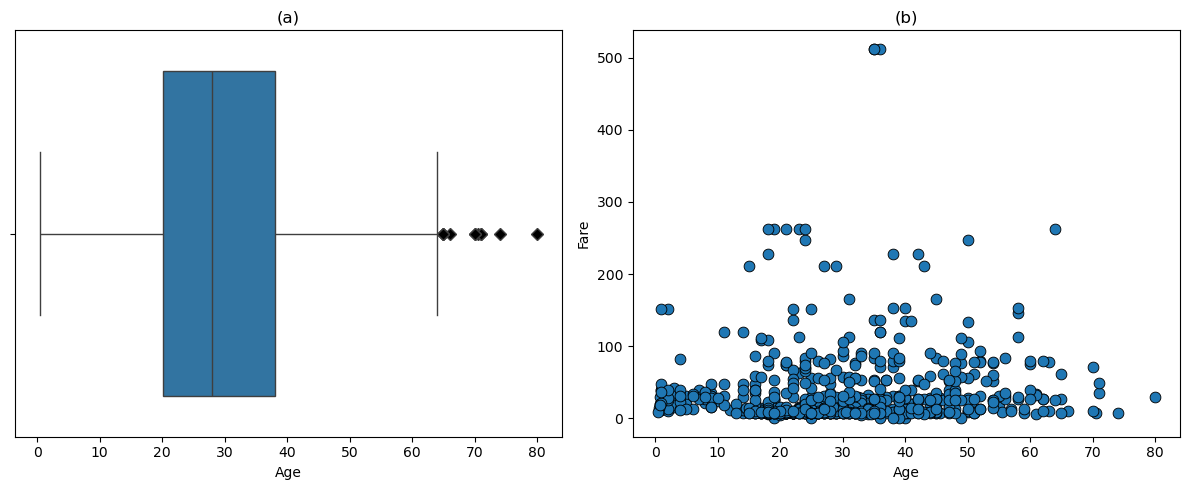

In [12]:
# Préparation des données
df_age = df[['age']].dropna()
df_scatter = df[['age', 'fare']].dropna()

# Création de la figure
fig = plt.figure(figsize=(12, 5))

# (a) Boxplot pour détecter visuellement les outliers
plt.subplot(1, 2, 1)
sns.boxplot(x=df_age['age'],flierprops={"marker": "D","markerfacecolor":'black'})
plt.title("(a)")
plt.xlabel("Age")

# (b) Scatter plot Age vs Fare
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=df_scatter,
    x='age',
    y='fare',
    edgecolor='black',
    s=60)

plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("(b)")
plt.tight_layout()

# Affichage du graphique
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_1.13/Chap1_Figure_1.13")

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.8 : Mise à l'échelle de la variable "age"</h3>

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Sélectionner la colonne 'Age' et supprimer les valeurs manquantes pour l'illustration
df = sns.load_dataset("titanic")
age_data = df['age'].dropna().values.reshape(-1, 1)

# Initialiser les scalers
scaler_standard = StandardScaler()
scaler_minmax   = MinMaxScaler()
scaler_robust   = RobustScaler()

# Standardisation
age_standardized    = scaler_standard.fit_transform(age_data)
age_standardized_df = pd.DataFrame(age_standardized, columns=['Age_Standardized'])

# Normalisation (Min-Max Scaling) sur l'intervalle [0, 1] par défaut
# Pour normaliser sur l'intervalle [-1, 1], utiliser 
# scaler_minmax = MinMaxScaler(feature_range=(-1, 1))
age_normalized    = scaler_minmax.fit_transform(age_data)
age_normalized_df = pd.DataFrame(age_normalized, columns=['Age_Normalized'])

# Mise à l'échelle robuste
age_robust_scaled    = scaler_robust.fit_transform(age_data)
age_robust_scaled_df = pd.DataFrame(age_robust_scaled, columns=['Age_RobustScaled'])

<h3><span style="font-size: 30px">🎴</span> Figure 1.14 : Comparaison des distributions de la variable "age" (a) avant la transformation et après transformation (b) par standardisation (c) par normalisation min-max et (d) par mise à l'échelle robuste. </h3>

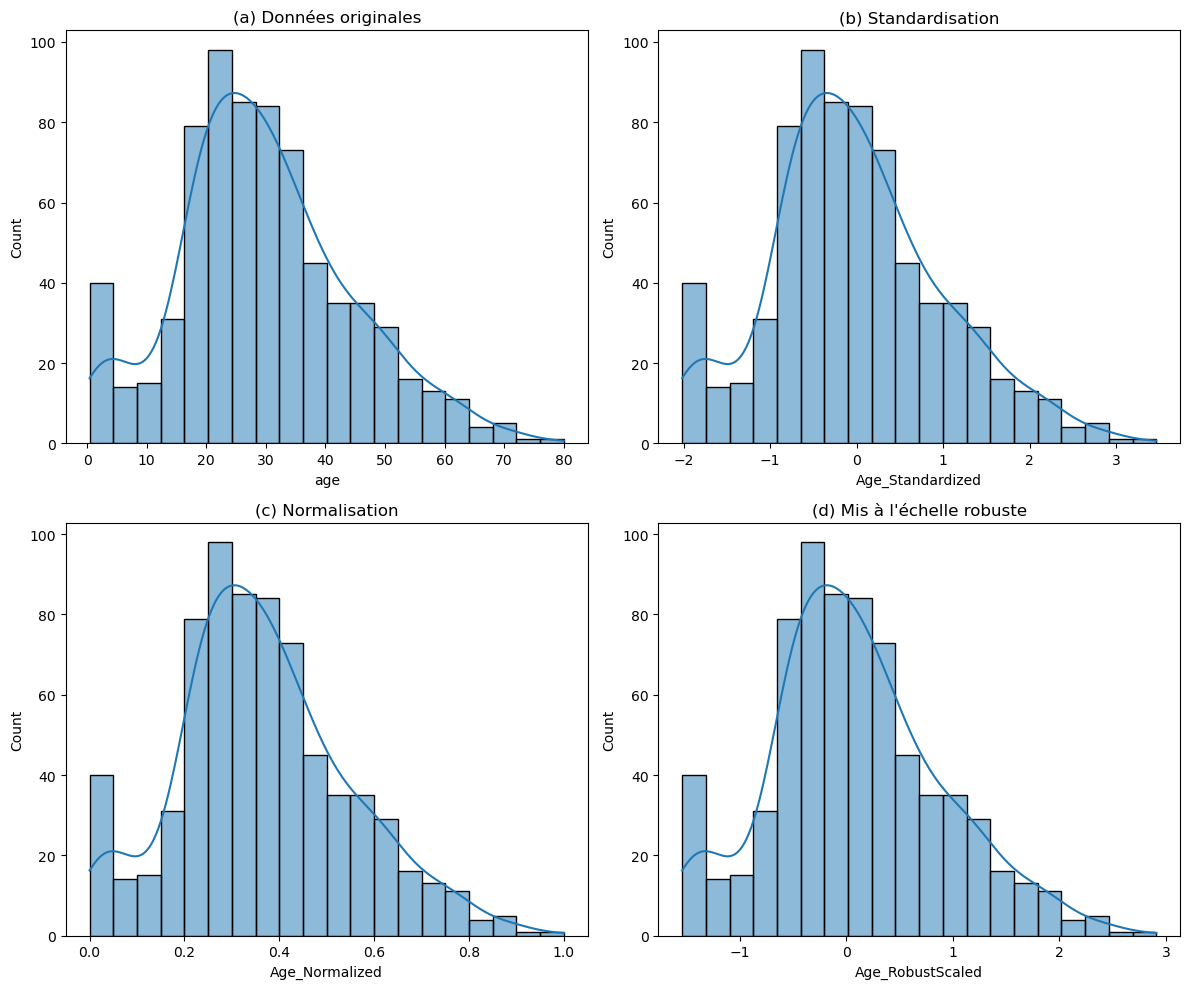

In [14]:
# Visualisation des distributions
fig = plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.histplot(df['age'].dropna(), kde=True)
plt.title('(a) Données originales')

plt.subplot(2, 2, 2)
sns.histplot(age_standardized_df['Age_Standardized'], kde=True)
plt.title('(b) Standardisation')


plt.subplot(2, 2, 3)
sns.histplot(age_normalized_df['Age_Normalized'], kde=True)
plt.title('(c) Normalisation')


plt.subplot(2, 2, 4)
sns.histplot(age_robust_scaled_df['Age_RobustScaled'], kde=True)
plt.title('(d) Mis à l\'échelle robuste')

plt.tight_layout()

# Affichage du graphique
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_1.14/Chap1_Figure_1.14")

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.9 : Détection et suppression des doublons dans le jeu de données Titanic</h3>

In [15]:
# Nombre de lignes avant traitement
n_initial = len(df)

# Détection des doublons
duplicates   = df.duplicated()
n_duplicates = duplicates.sum()

# Suppression des doublons (on conserve la première occurrence)
df_no_duplicates = df.drop_duplicates()
n_final = len(df_no_duplicates)

# Affichage structuré des résultats
print("=" * 44)
print("Traitement des doublons")
print("=" * 44)
print(f"Nombre de lignes initial              : {n_initial}")
print(f"Nombre de lignes dupliquées détectées : {n_duplicates}")
print(f"Nombre de lignes après suppression    : {n_final}")
print("=" * 44)


Traitement des doublons
Nombre de lignes initial              : 891
Nombre de lignes dupliquées détectées : 107
Nombre de lignes après suppression    : 784


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.10 : Nettoyage et encodage de la variable "embarked"</h3>

In [16]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Nettoyage de la variable 'embarked'
df = df[df['embarked'].isin(['C', 'Q', 'S'])].copy()

# Encodage ordinal (ordre arbitraire : C < Q < S)
ordinal_enc = OrdinalEncoder(categories=[['C', 'Q', 'S']])
df['embarked_ordinal'] = ordinal_enc.fit_transform(df[['embarked']])

# Encodage entier (codes de catégories)
df['embarked_int'] = df['embarked'].astype('category').cat.codes

# Calcul du nombre minimal de bits pour l'encodage binaire
max_bits = int(df['embarked_int'].max()).bit_length()

# Encodage binaire
binary_df = df['embarked_int'].apply(
    lambda x: pd.Series(list(map(int, format(x, f'0{max_bits}b'))))
)
binary_df.columns = [f'embarked_bin_{i}' for i in range(max_bits)]

# Supprimer d'anciennes colonnes binaires si elles existent
df = df.drop(columns=[col for col in df.columns if col.startswith('embarked_bin_')], errors='ignore')

# Fusion des encodages
df = pd.concat([df, binary_df], axis=1)

# Affichage structuré
print("=" * 50)
print("Encodage de la variable 'embarked'")
print("=" * 50)
print(df[['embarked', 'embarked_ordinal', 'embarked_int'] + list(binary_df.columns)].head())


Encodage de la variable 'embarked'
  embarked  embarked_ordinal  embarked_int  embarked_bin_0  embarked_bin_1
0        S               2.0             2               1               0
1        C               0.0             0               0               0
2        S               2.0             2               1               0
3        S               2.0             2               1               0
4        S               2.0             2               1               0


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.11 : Division de l'ensemble des données en trois sous-ensembles</h3>

In [17]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Génération de données factices pour l'entraînement et le test
# X contient les caractéristiques des échantillons (1000 lignes × 20 colonnes)
# y regroupe les étiquettes de classification (0 ou 1)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Sépration du jeu de données initial en un ensemble d'entraînement (80%) et un ensemble de test (20%). La stratification se fait selon les étiquettes y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Sépration de X_train en 70% pour entrainement  et 30% pour validation. Cette instruction écrase les anciennes variables X_train et y_train.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3)

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.12 : Stratégies de validation</h3>

In [18]:
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Définir la validation croisée k-fold (5 partitions)
kf = KFold(n_splits=5)

# Définir la validation croisée LOOCV (Leave-One-Out)
loo = LeaveOneOut()

# Définir la validation croisée shuffle split (10 partitions avec 30% pour le test)
ss = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

# Création d'un modèle d'apprentissage automatique (Random Forest)
model = RandomForestClassifier()

# Séparation des données en un ensemble d'entraînement (70%) et un ensemble de test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Évaluation du modèle avec la validation croisée k-fold (5 partitions)
scores = cross_val_score(model, X_train, y_train, cv=kf)

# Évaluation du modèle avec chaque type de validation croisée
scores_kf  = cross_val_score(model, X_train, y_train, cv=kf)
scores_loo = cross_val_score(model, X_train, y_train, cv=loo)
scores_ss  = cross_val_score(model, X_train, y_train, cv=ss)

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.13 : Génération et partition des données</h3>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Génération de données factices pour l'entraînement et le test
# X représente la matrice des caractéristiques avec 1000 échantillons et 20 variables
# y est le vecteur des étiquettes de classe (0 ou 1) pour un problème de classification binaire
X, y = make_classification(n_samples=1000,  # Nombre total d'échantillons
                           n_features=20,   # Nombre de caractéristiques par échantillon
                           n_classes=2,     # Classification binaire (deux classes : 0 et 1)
                           random_state=42) # Reproductibilité des résultats

# Séparation du jeu de données en ensemble d'entraînement et de test
# 70 % des données sont utilisées pour l'entraînement, 30 % pour le test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,  # Proportion des données allouées au test
                                                    random_state=42) # Assurer la reproductibilité du découpage


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.14 : Création et entraînement du modèle</h3>

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation du modèle Random Forest avec un état aléatoire fixé pour la reproductibilité
model = RandomForestClassifier(random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédiction des classes sur l'ensemble de test
y_pred = model.predict(X_test)

# Prédiction des probabilités d'appartenance à la classe positive (1)
y_pred_proba = model.predict_proba(X_test)[:, 1]

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.15 : Évaluation du modèle</h3>

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Extraction des valeurs de la matrice de confusion
tn, fp, fn, tp = conf_matrix.ravel()

# Calcul des métriques de performance
sensibilite = tp / (tp + fn)  # Sensibilité (rappel)
specificite = tn / (tn + fp)  # Spécificité

# Affichage des résultats
print("Matrice de confusion :\n", conf_matrix)
print(f" Sensibilité (Rappel)  : {sensibilite:.4f}")
print(f" Spécificité           : {specificite:.4f}")

Matrice de confusion :
 [[129  16]
 [ 27 128]]
 Sensibilité (Rappel)  : 0.8258
 Spécificité           : 0.8897


<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.16 : Rapport de classification</h3>

In [22]:
from sklearn.metrics import classification_report

print("\nClassification Report :\n", classification_report(y_test, y_pred))


Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.89      0.86       145
           1       0.89      0.83      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300



<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.17 : Affichage de la matrice de confusion</h3>

<h3><span style="font-size: 30px">🎴</span> Figure 1.19 : Affichage de la matrice de confusion pour le Livre </h3>

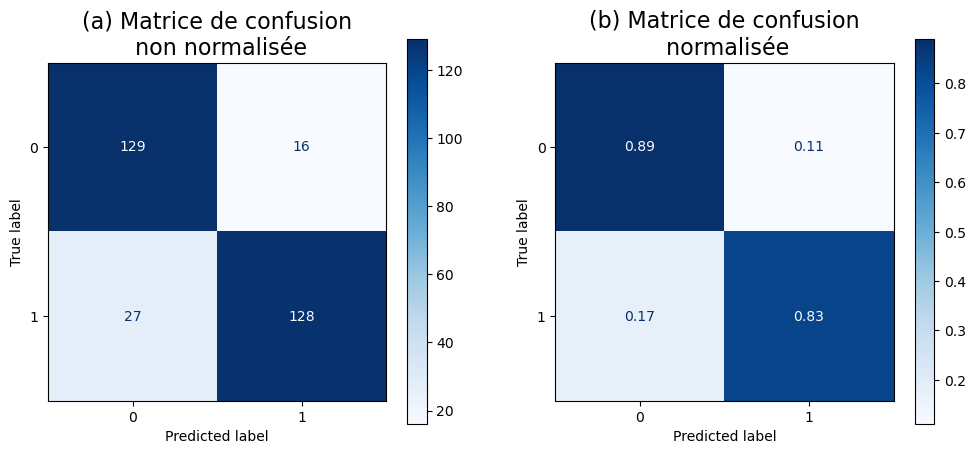

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Normalisation de la matrice de confusion (par ligne)
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

display(HTML('<h3><span style="font-size: 30px">🎴</span> Figure 1.17 : Affichage de la matrice de confusion pour le Livre </h3>'))
# Création des sous-graphiques
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Affichage de la matrice de confusion (non normalisée)
disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp1.plot(cmap='Blues', ax=ax[0])
ax[0].set_title("(a) Matrice de confusion\n non normalisée", fontsize=16)

# Affichage de la matrice de confusion normalisée
disp2 = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_normalized)
disp2.plot(cmap='Blues', ax=ax[1])
ax[1].set_title("(b) Matrice de confusion\n normalisée", fontsize=16)

# Affichage du graphique
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_1.19/Chap1_Figure_1.19")

<h3><span style="font-size: 30px">🎴</span> Figure 1.20 - Courbe ROC</h3>

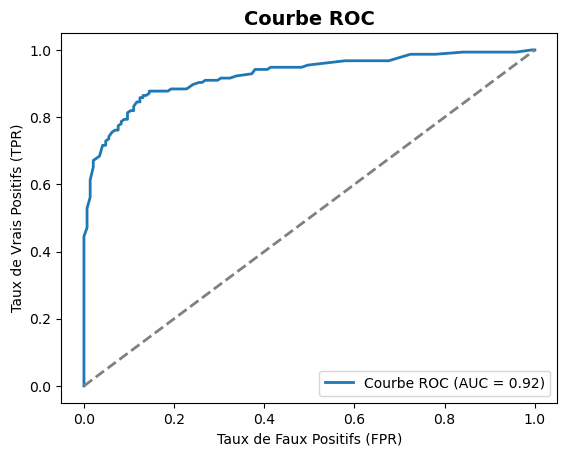

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Prédire les probabilités pour l'ensemble de test
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilité de la classe positive

# Calculer les métriques pour la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Définir la taille de la figure
fig, ax = plt.subplots()

# Tracer la courbe ROC
ax.plot(fpr, tpr, lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
ax.plot([0, 1], [0, 1], color='grey', linestyle='--', lw=2)  # Diagonale

# Ajouter les labels et le titre
ax.set_xlabel('Taux de Faux Positifs (FPR)')
ax.set_ylabel('Taux de Vrais Positifs (TPR)')
ax.set_title('Courbe ROC', fontsize=14, fontweight='bold')

# Ajouter la légende
ax.legend(loc="lower right")

# Affichage du graphique
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_1.20/Chap1_Figure_1.20")

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.18 : Regroupement des données via l'algorithme K-means</h3>

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Fixer la graine aléatoire pour la reproductibilité
np.random.seed(42)

# Générer des données synthétiques
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=1.2)

# Appliquer le clustering avec KMeans
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X)

<h3><span style="font-size: 30px">&#128187;</span> Extrait de code 1.19 : Métriques d'évaluation des regroupements</h3>

In [26]:
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.metrics import davies_bouldin_score
import numpy as np

# Indice de Silhouette
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Indice de silhouette : {silhouette_avg:.2f}")

# Cohésion intra-cluster (moyenne des distances entre les points et leurs centres)
distances = np.linalg.norm(X - kmeans.cluster_centers_[y_kmeans], axis=1)
cohesion = np.mean(distances)
print(f"Cohésion intra-cluster (distance moyenne) : {cohesion:.2f}")

# Séparation inter-cluster (moyenne des distances entre les centres des clusters)
centroid_distances = pairwise_distances(kmeans.cluster_centers_)
np.fill_diagonal(centroid_distances, np.nan)  # Éviter les distances nulles entre un centre et lui-même
separation = np.nanmean(centroid_distances)  # Moyenne des distances entre les centres
print(f"Séparation inter-cluster (distance moyenne entre les centres) : {separation:.2f}")

# Davies-Bouldin Index 
db_index = davies_bouldin_score(X, y_kmeans)
print(f"Indice Davies-Bouldin : {db_index:.2f}")

Indice de silhouette : 0.75
Cohésion intra-cluster (distance moyenne) : 1.46
Séparation inter-cluster (distance moyenne entre les centres) : 12.69
Indice Davies-Bouldin : 0.35


<h3><span style="font-size: 30px">🎴</span> Figure 1.21 - Visualisation des clusters obtenus avec l'algorithme k-means</h3>

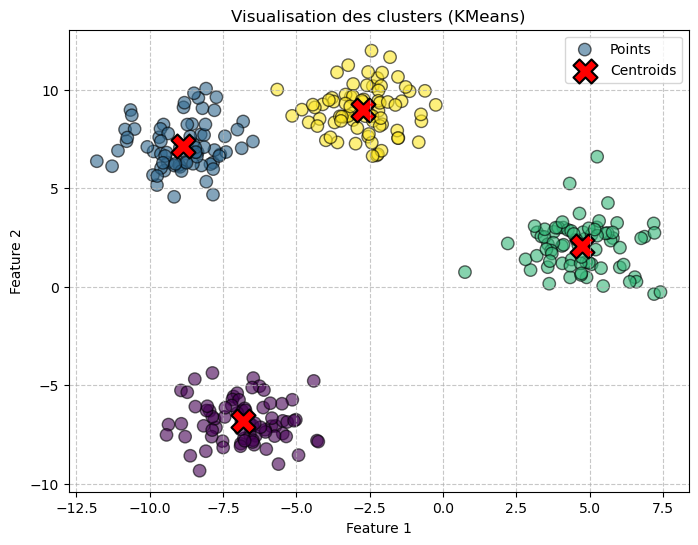

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6))

# Affichage des points de données du clustering
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', alpha=0.6, s=80, edgecolors='black', label='Points')

# Affichage des centroïdes représentant le centre de chaque cluster
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='X', edgecolors='black',
            linewidths=1.5, label='Centroids')

# Titre et étiquettes des axes
plt.title("Visualisation des clusters (KMeans)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Ajouter la grille
plt.grid(True, linestyle='--', alpha=0.7)

# Legend
plt.legend()

# Affichage du graphique
plt.show()

# Sauvegarder la figure
save_figure(fig, "Figures/Figure_1.21/Chap1_Figure_1.21")

<hr style='border-top:4px solid #1F77B4;'>